# **Evaluating the Effectiveness of a New Marketing Campaign in Improving Conversion Rates**

---

## 1. Project Overview

* **Business Context:**

A company aims to implement a new advertising campaign to increase its conversion rate. The company currently relies on public service announcements (PSAs) for marketing but seeks to assess the potential of a new ad campaign in driving conversions and revenue.

* **Objective:**

The objective of this project is to determine the potential revenue increase from implementing the new ad campaign compared to using PSAs. Additionally, the project aims to assess whether the observed difference in conversion rates between the two campaigns is statistically significant.

* **Expected Outcomes:**
1. Quantifying the potential revenue gain from the new ad campaign.
2. Determining the statistical significance of the difference in conversion rates between the new ad campaign and PSAs.
3. Providing actionable recommendations to the company based on the findings.

* **Data Source:**

The dataset used in this project describes the results of an A/B test conducted by the company. It is titled "Marketing A/B Testing" and can be found on Kaggle. Link: //[https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data]. The dataset provides information on user behavior and conversion rates for both the PSA and the new ad campaign.

* **Methodology:**

The project will follow a structured methodology consisting of the following steps:

1. Data Wrangling: Cleaning and preparing the dataset for analysis.
2. Exploratory Data Analysis (EDA): Investigating the data to understand patterns, relationships, and potential insights.
3. Hypothesis Testing: Conducting statistical tests to assess the significance of the observed differences in conversion rates.
4. Actionable Recommendations: Providing data-driven recommendations to the company based on the analysis results.

This project aims to provide the company with data-driven insights into the effectiveness of the new ad campaign compared to PSAs. By quantifying the potential revenue increase and assessing the statistical significance of the observed differences, the project will empower the company to make informed decisions about implementing the new campaign and optimizing its marketing strategies to improve conversions and business outcomes.

---

## 2. Data Wrangling

### 2.1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

pd.set_option("display.max_columns",None)
pd.set_option("display.float_format", "{:.4f}".format)

### 2.2. Load Dataset

In [ ]:
data = pd.read_csv('/content/marketing_AB.csv')
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


### 2.3. Data Overview

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0000,294050.0000,169770.2797,0.0000,147025.0000,294050.0000,441075.0000,588100.0000
user id,588101.0000,1310692.2158,202225.9831,900000.0000,1143190.0000,1313725.0000,1484088.0000,1654483.0000
total ads,588101.0000,24.8209,43.7152,1.0000,4.0000,13.0000,27.0000,2065.0000
most ads hour,588101.0000,14.4691,4.8346,0.0000,11.0000,14.0000,18.0000,23.0000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
test group,588101,2,ad,564577
most ads day,588101,7,Friday,92608


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


This dataset describes an A/B test results run by a company that wanna find if the ads were successful and how much the company can make from the ads.

It consists of 6 features and more than 588.101 rows:

* `user_id`: User ID (unique)
* `test_group`: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* `converted`: If a person bought the product then 1, if not 0
* `total_ads`: Amount of ads seen by person
* `most_ads_day`: Day that the person saw the biggest amount of ads
* `most_ads_hour`: Hour of day that the person saw the biggest amount of ads

### 2.4. Data Inspection

#### 2.4.1. Missing Values

<Axes: >

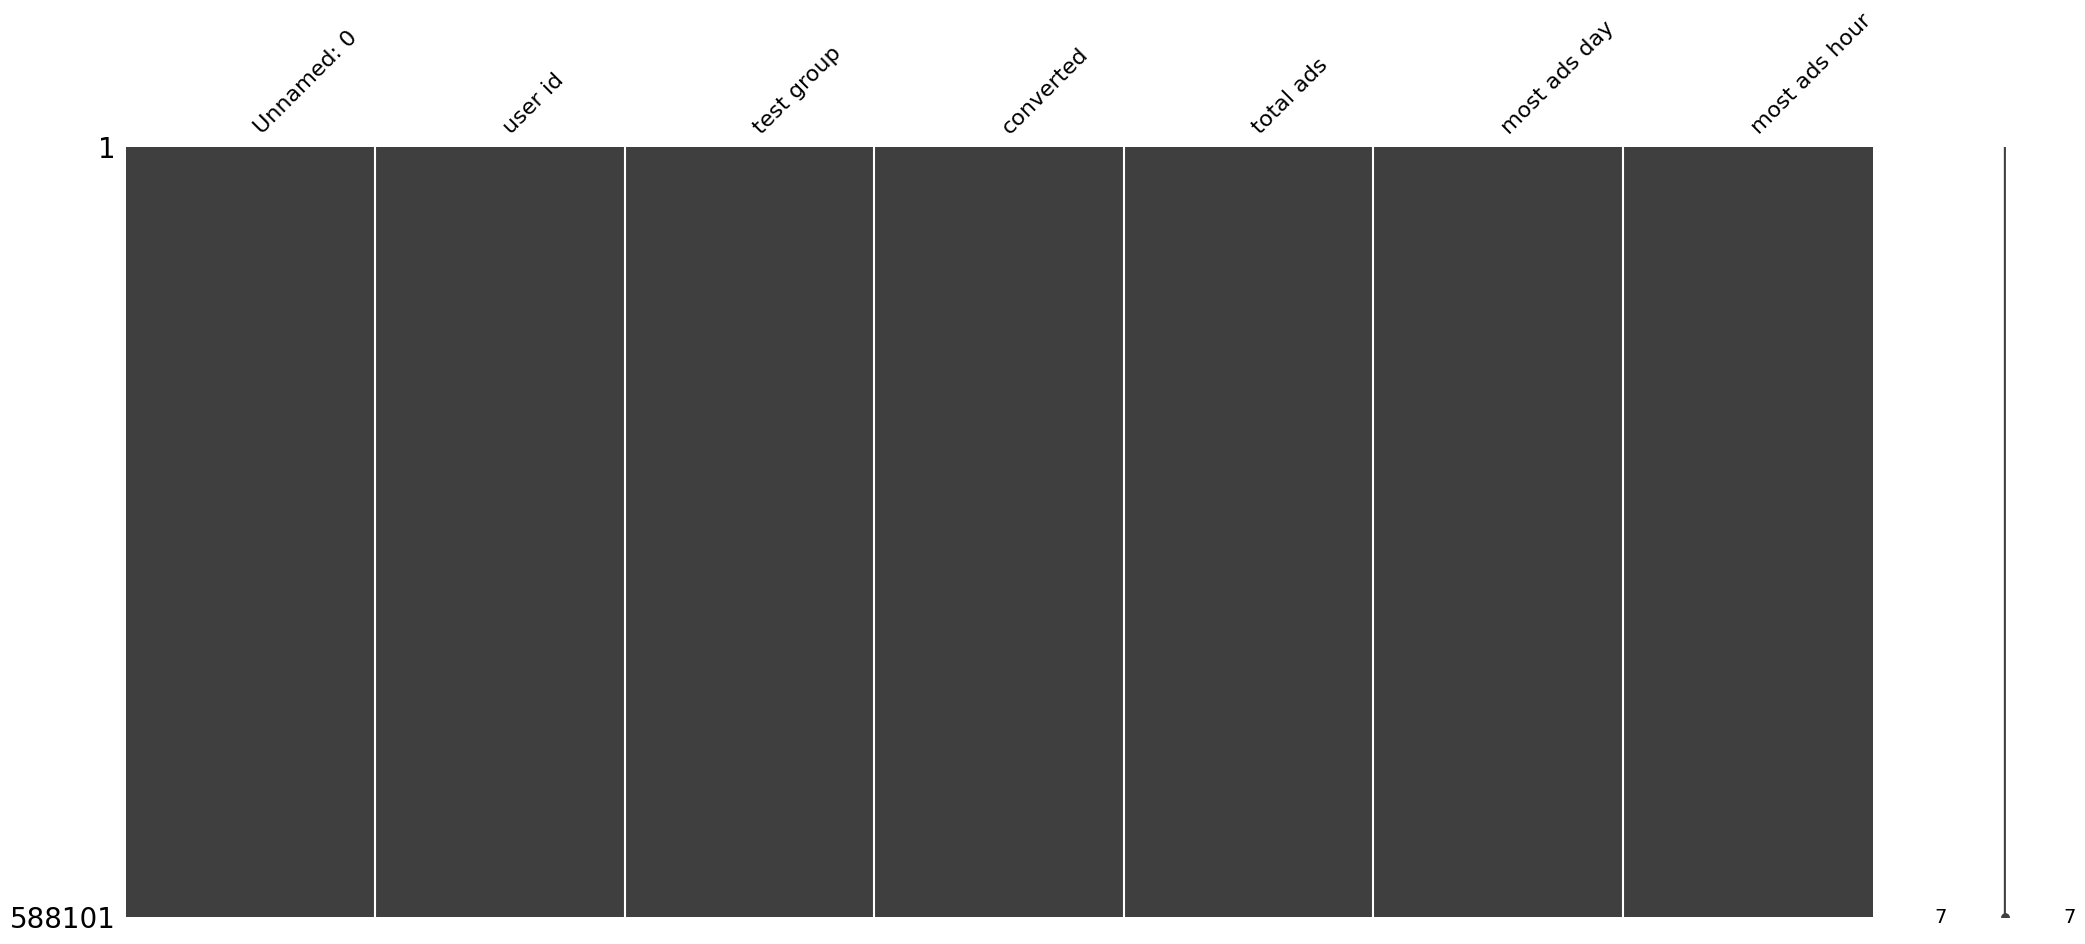

In [ ]:
msno.matrix(data)

There are no missing values!

#### 2.4.2. Data Cleansing

In [ ]:
data = data.drop('Unnamed: 0', axis =1)

In [ ]:
data.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [ ]:
data['converted'] = data['converted'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  int64 
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


In [ ]:
data.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


#### 2.4.3. Duplicate

In [ ]:
data.duplicated().sum()

0

In [ ]:
len(data[data.duplicated(subset = ['user_id']) == True])

0

The dataset is clean now!

## 3. Hypothesis Testing

### 3.1. Power Analysis

I'll conduct a power analysis to see the minimum number of data that are needed to prove/reject the hypothesis.

In [ ]:
ads_convertrate = data[data['test_group'] == 'psa']['converted'].mean() * 100

print(f'Ads Conversion Rate: {str(round(ads_convertrate,2))} %')

Ads Conversion Rate: 1.79 %


The conversion rate (number of purchases/number of visits) in the company when only using public service announcements was `1.79 %` and the expected increase will be set to `3 %` to ensure that the new ads campaign will certainly increase the conversion.

In [ ]:
effect_size = sms.proportion_effectsize(0.018, 0.030)

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1)

required_n = ceil(required_n)

print(f'For this experiment, we need at least {required_n} data for each group')

For this experiment, we need at least 2514 data for each group


In [ ]:
data['test_group'].value_counts()

,count
test_group,
ad,564577
psa,23524


The data fulfilled the requirement for doing the experiment since both groups had more than enough data.

In [ ]:
control_group = data.query('test_group == "psa"').sample(required_n)
treatment_group = data.query('test_group == "ad"').sample(required_n)

ab_test = pd.concat([control_group, treatment_group], axis=0)
ab_test.reset_index(inplace=True, drop=True)
ab_test

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,908674,psa,0,11,Tuesday,14
1,903035,psa,0,3,Sunday,17
2,915544,psa,0,41,Thursday,13
3,923482,psa,0,1,Wednesday,16
4,913792,psa,0,48,Saturday,9
...,...,...,...,...,...,...
5023,1378354,ad,0,5,Thursday,9
5024,1488585,ad,0,1,Tuesday,10
5025,1260966,ad,0,326,Tuesday,14
5026,1235660,ad,0,37,Tuesday,20


In [ ]:
ab_test['test_group'].value_counts()

,count
test_group,
psa,2514
ad,2514


In [ ]:
conversion_rates = ab_test.groupby('test_group')['converted']

std_p = lambda x: np.std(x, ddof=1)
se_p = lambda x: stats.sem(x, ddof=1)

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])*100
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates.reset_index(inplace=True)

conversion_rates

,test_group,conversion_rate,std_deviation,std_error
0,ad,2.7844,16.4559,0.3282
1,psa,1.6309,12.6685,0.2527


In [ ]:
fig = px.bar(
    conversion_rates,
    x='test_group',
    y='conversion_rate',
    color='test_group',
    title='Conversion Rate',
    labels={'conversion_rate': 'Conversion Rate', 'test_group': 'Group'},
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text=conversion_rates['conversion_rate'].apply(lambda x: f'{x:.2f}%')
)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Percentage',
    xaxis_title='Group',
    legend_title='Conversion Rate',
    width=1000,
    height=600,
    showlegend=False
)
fig.show()

It shows that the new ads campaign performs slighty well than the psa. The change in conversion rate does suggest that there is an improvement of **`1.15 %`** when we use the new ads campaign (`2.78%`), it is slightly higher than the psa (`1.63 %`).

However, let's validate whether this difference is statistically significant!

### 3.2. The A/B Test

**Does this new ads campaign improve the conversion rates?**

* `H0`: The new ads campaign `does not significantly improve the conversion rates`.
* `H1`: The new ads campaign `does significantly improve the conversion rates`.

I'll perform a statistical test to compare these two groups with using z-test to calculate the p-value considering the large sample size.

Let's reveal the p-value and confidence interval!

In [ ]:
psa_results = ab_test[ab_test['test_group'] == 'psa']['converted']
ad_results = ab_test[ab_test['test_group'] == 'ad']['converted']
n_psa = psa_results.count()
n_ad = ad_results.count()
successes = [psa_results.sum(), ad_results.sum()]
nobs = [n_psa, n_ad]

z_stat, p_val = proportions_ztest(successes, nobs=nobs)
(lower_psa, lower_ad), (upper_psa, upper_ad) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'Z Statistic: {z_stat:.2f}')
print(f'p-value: {p_val:.3f}')
print(f'95% Confidence Interval for Public Service Announcements Group: [{lower_psa:.3f}, {upper_psa:.3f}]')
print(f'95% Confidence Interval for Advertisement Group: [{lower_ad:.3f}, {upper_ad:.3f}]')

if p_val < 0.05:
    print('''
    ---------------------------------------------------------------------------------------------------
    Reject the null hypothesis \n

    It statistically validates that the new ads campaign does significantly improve the conversion rates.
    ---------------------------------------------------------------------------------------------------
    ''')
else:
    print('Fail to reject the null hypothesis')

Z Statistic: -2.78
p-value: 0.005
95% Confidence Interval for Public Service Announcements Group: [0.011, 0.021]
95% Confidence Interval for Advertisement Group: [0.021, 0.034]

    ---------------------------------------------------------------------------------------------------
    Reject the null hypothesis 


    It statistically validates that the new ads campaign does significantly improve the conversion rates.
    ---------------------------------------------------------------------------------------------------
    


### 3.3. Potential Revenue Gain

Let's assume an AOV (Average Order Value) of `$50`!

In [ ]:
AOV = 50
user_traffic = 2514
conversion_rate_diff = 2.78 - 1.63
incremental_conversions = (user_traffic * conversion_rate_diff) / 100
revenue_gain = incremental_conversions * AOV

print(f'Incremental Conversions = {incremental_conversions:.2f} conversions')
print(f'Revenue Gain = $ {revenue_gain:.2f}')

Incremental Conversions = 28.91 conversions
Revenue Gain = $ 1445.55


## 4. Conclusion

The A/B test provides statistically significant evidence to conclude that **`the new ad campaign improves conversion rates`** compared to the public service announcements (PSA).

* **Rejecting the Null Hypothesis::** With a p-value of 0.005, which is less than the significance level of 0.05, we reject the null hypothesis. This indicates a statistically significant difference in conversion rates between the two groups.

* **Confidence Intervals:** The 95% confidence intervals for the ad campaign (0.021, 0.034) and the PSA group (0.011, 0.021) do not overlap, supporting the conclusion of a significant difference.

* **Improved Conversion Rates:** The new ad campaign demonstrates a higher conversion rate (2.78 %) than the PSA group (1.63 %), representing an improvement of `1.15 %`.

* **Z Statistic:** The Z statistic of -2.78 further indicates the significance of the difference observed.

* **Potential Revenue Gain:** in this scenario, the potential revenue gain from the new ad campaign would be `$1.445.55`.

**Recommendation**

Based on these findings, it is recommended to implement the new ad campaign to potentially improve overall conversion rates and drive positive business outcomes. The statistical evidence strongly supports its effectiveness in driving conversions compared to the previous approach using public service announcements.